### Train a CNN model on CIFAR10

### Prepare dataset for training

In [11]:
%matplotlib inline

import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms

import numpy as np
import matplotlib.pyplot as plt

Compile the Transform function

- Transform to tensors
- Normalise in the range of -1 to 1; with a mean of 0.5 and std_dev of 0.5

In [12]:
mean = 0.5
std_dev = 0.5

transform = transforms.Compose([
                                    transforms.ToTensor(),
                                    transforms.Normalize((mean)*3, (std_dev)*3)
])

In [13]:
trainset = torchvision.datasets.CIFAR10(root='./data', download=True, train=True, transform=transform)

Files already downloaded and verified


Dataloader to create batches from the data and shuffle

In [14]:
train_data = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=2, num_workers=2)


Vizualize the dataset

In [15]:
(trainset.classes)


['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

['dog', 'airplane', 'automobile', 'frog']


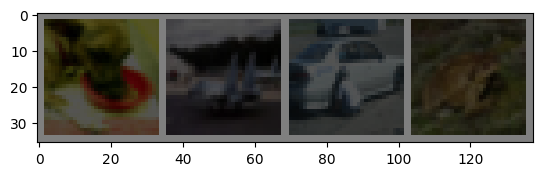

In [16]:
def image_show(img):
    img = (img*std_dev + mean).numpy()
    plt.imshow(np.transpose(img, (1, 2, 0)))

#get some random training images
data_sample = iter(train_data)
images, labels = next(data_sample)

#show images
image_show(torchvision.utils.make_grid(images))

#print labels
print([trainset.classes[l] for l in labels])


Create CNN model

In [17]:
class cnn_model(nn.Module):

    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [35]:
model = cnn_model()

In [36]:
model

cnn_model(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

Loss and Optimizer

In [37]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 2e-4, momentum=0.9)

In [38]:
for epoch in range(2):

    running_loss = 0.0
    for i, data in enumerate(train_data, 0):

        inputs, labels = data

        #zero the gradients
        optimizer.zero_grad()

        #forward pass
        outputs = model(inputs)

        #calc loss
        loss = loss_fn(outputs, labels)

        #compute gradients
        loss.backward()

        #update the weights/optimise
        optimizer.step()

        #print training stats
        running_loss += loss.item()
        if (i)%2000 == 1999:
            print('loss:: ', epoch+1, i+1, running_loss/2000)
            running_loss = 0

print('Training Completed!!!')

loss::  1 2000 2.3026697177886963
loss::  1 4000 2.3011000843048097
loss::  1 6000 2.2991014046669007
loss::  1 8000 2.2926984000205994
loss::  1 10000 2.26118147367239
loss::  1 12000 2.1885916669368743
loss::  2 2000 2.1219901261329652
loss::  2 4000 2.0576645548939707
loss::  2 6000 2.0184087262749673
loss::  2 8000 1.98211400488019
loss::  2 10000 1.949268201470375
loss::  2 12000 1.9007476674616337
Training Completed!!!


*** Every time the training loop is run, training starts from model parameters saved in memory from last run. Unless the model instance is created again.

Evaluate Model

In [39]:
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
test_data = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

Files already downloaded and verified


In [42]:
correct = 0
total = 0
with torch.no_grad():
    for data in test_data:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        print(labels, predicted)
        total +=labels.size(0)
        correct += (labels==predicted).sum().item()

print("Accuracy::", 100*correct/total)


tensor([3, 8, 8, 0]) tensor([1, 8, 8, 8])
tensor([6, 6, 1, 6]) tensor([3, 6, 5, 3])
tensor([3, 1, 0, 9]) tensor([5, 8, 8, 1])
tensor([5, 7, 9, 8]) tensor([3, 1, 1, 8])
tensor([5, 7, 8, 6]) tensor([5, 2, 8, 6])
tensor([7, 0, 4, 9]) tensor([0, 0, 0, 9])
tensor([5, 2, 4, 0]) tensor([7, 1, 7, 9])
tensor([9, 6, 6, 5]) tensor([1, 6, 3, 2])
tensor([4, 5, 9, 2]) tensor([5, 3, 8, 1])
tensor([4, 1, 9, 5]) tensor([6, 8, 9, 5])
tensor([4, 6, 5, 6]) tensor([0, 3, 3, 3])
tensor([0, 9, 3, 9]) tensor([0, 8, 3, 8])
tensor([7, 6, 9, 8]) tensor([4, 6, 8, 8])
tensor([0, 3, 8, 8]) tensor([1, 3, 8, 8])
tensor([7, 7, 4, 6]) tensor([7, 1, 9, 2])
tensor([7, 3, 6, 3]) tensor([7, 3, 1, 9])
tensor([6, 2, 1, 2]) tensor([3, 3, 8, 0])
tensor([3, 7, 2, 6]) tensor([3, 9, 2, 3])
tensor([8, 8, 0, 2]) tensor([8, 8, 0, 2])
tensor([9, 3, 3, 8]) tensor([1, 1, 3, 8])
tensor([8, 1, 1, 7]) tensor([8, 1, 1, 0])
tensor([2, 5, 2, 7]) tensor([0, 0, 0, 8])
tensor([8, 9, 0, 3]) tensor([8, 8, 8, 3])
tensor([8, 6, 4, 6]) tensor([8, 9,